## This file perform a mini-benchmark of the execution time of the stackedclasses.

In [1]:
import sys
from os import path
import time
sys.path.append(path.dirname(path.dirname(path.abspath("Test.ipynb"))))
from Controllers_Definition import testcontroller1, testcontroller2, testcontroller3, testcontroller4
from FMLC.triggering import triggering
from FMLC.baseclasses import eFMU
from FMLC.stackedclasses import controller_stack
import matplotlib.pyplot as plt

Note: Each controller is in a seperate task.

In [2]:
run_time = []
num_controllers_list = range(5, 41, 5)
for num_controllers in num_controllers_list:
    # Init
    controllers = {}
    mapping = {}
    for i in range(num_controllers):
        controllers['controller%s' % i] = {'fun':testcontroller1, 'sampletime':0.25}
        mapping['controller%s_a' % i] = 10
        mapping['controller%s_b' % i] = 4
    ctrl_stack = controller_stack(controllers, mapping, tz=-8, debug=True, parallel=True, timeout=2)
    # Call query_control 6 times
    start_time = time.time()
    for i in range(6):
        ctrl_stack.query_control(time.time())
        # Sleep can be necessary since the run time can be less than the sample time. 
        time.sleep(0.3)
    # Note I subtract the total sleep time from the final run time. 
    run_time.append(time.time()-start_time-0.3*6)
    ctrl_stack.shutdown()
    print(num_controllers)

5
10
15
20
25
30
35
40


Text(0.5, 1.0, 'Runtime vs #of Controllers')

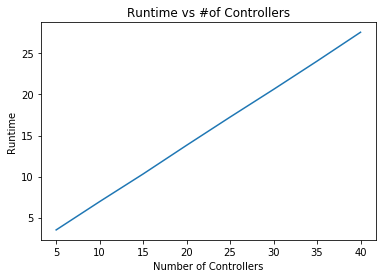

In [3]:
plt.plot(num_controllers_list, run_time)
plt.xlabel("Number of Controllers")
plt.ylabel("Runtime")
plt.title("Runtime vs #of Controllers")